In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

2023-12-28 17:37:34.011578: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-28 17:37:34.011661: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-28 17:37:34.060757: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-28 17:37:34.165336: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-28 17:37:35.155293: W tensorflow/compiler/tf2

In [2]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                               height_shift_range=.2,
                                                               width_shift_range=.2,
                                                               zoom_range=.4,
                                                               rotation_range=.4,
                                                               horizontal_flip=True)

In [4]:
train_df = train_datagen.flow_from_directory('./seg_train/seg_train/',
                                            target_size=(150, 150),
                                             color_mode='rgb',
                                             seed=0,
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle=True,
                                            )

Found 14034 images belonging to 6 classes.


In [5]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [6]:
val_df = val_datagen.flow_from_directory('./seg_test/seg_test/',
                                            target_size=(150, 150),
                                             color_mode='rgb',
                                             seed=0,
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle=True,
                                            )

Found 3000 images belonging to 6 classes.


### Model 1 - Fine Tuning with lambda learning rate (version 17)

In [ ]:
model.load('learning_rate_schelude.h5')

### Model 2 - HyperTunning with all results

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=['acc'])

model.build()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

2023-12-28 17:37:46.838118: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-28 17:37:46.996809: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-28 17:37:46.997098: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [8]:
history = model.fit(train_df, epochs=20, validation_data=val_df)

Epoch 1/20


2023-12-28 17:37:58.114490: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2023-12-28 17:37:58.299421: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-28 17:37:59.061861: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-28 17:37:59.139394: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f9ac4d44d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-28 17:37:59.139417: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-12-28 17:37:59.150812: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1703795879.231627    3888 device_compiler.

439/439 [==============================] - 76s 165ms/step - loss: 1.0838 - acc: 0.5776 - val_loss: 0.8147 - val_acc: 0.6833
Epoch 2/20
439/439 [==============================] - 67s 153ms/step - loss: 0.8126 - acc: 0.6925 - val_loss: 0.6526 - val_acc: 0.7660
Epoch 3/20
439/439 [==============================] - 68s 156ms/step - loss: 0.7029 - acc: 0.7376 - val_loss: 0.5733 - val_acc: 0.7853
Epoch 4/20
439/439 [==============================] - 71s 162ms/step - loss: 0.6265 - acc: 0.7657 - val_loss: 0.5082 - val_acc: 0.8107
Epoch 5/20
439/439 [==============================] - 68s 156ms/step - loss: 0.5783 - acc: 0.7886 - val_loss: 0.5155 - val_acc: 0.8053
Epoch 6/20
439/439 [==============================] - 71s 161ms/step - loss: 0.5372 - acc: 0.8017 - val_loss: 0.4223 - val_acc: 0.8517
Epoch 7/20
439/439 [==============================] - 72s 164ms/step - loss: 0.5082 - acc: 0.8158 - val_loss: 0.6205 - val_acc: 0.7833
Epoch 8/20
439/439 [==============================] - 67s 153ms/st

In [11]:
def plot_loss_curves(history):
    """
    Plots the curves of both loss and accuracy
    """

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
      
    epochs = range(len(loss))

    fig, ax = plt.subplots(1, 2, figsize = (20, 7))

    # Plotting loss
    ax1 = sns.lineplot(x = epochs, y = loss, label='Training Loss', ax= ax[0])
    ax1 = sns.lineplot(x = epochs, y = val_loss, label='Validation Loss', ax= ax[0])
    ax1.set(title = 'Loss', xlabel = 'Epochs')

    # Plot accuracy
    ax2 = sns.lineplot(x = epochs, y = accuracy, label='Training Accuracy', ax= ax[1])
    ax2 = sns.lineplot(x = epochs, y = val_accuracy, label='Validation Accuracy', ax=ax[1])
    ax2.set(title = 'Accuracy', xlabel = 'Epochs')

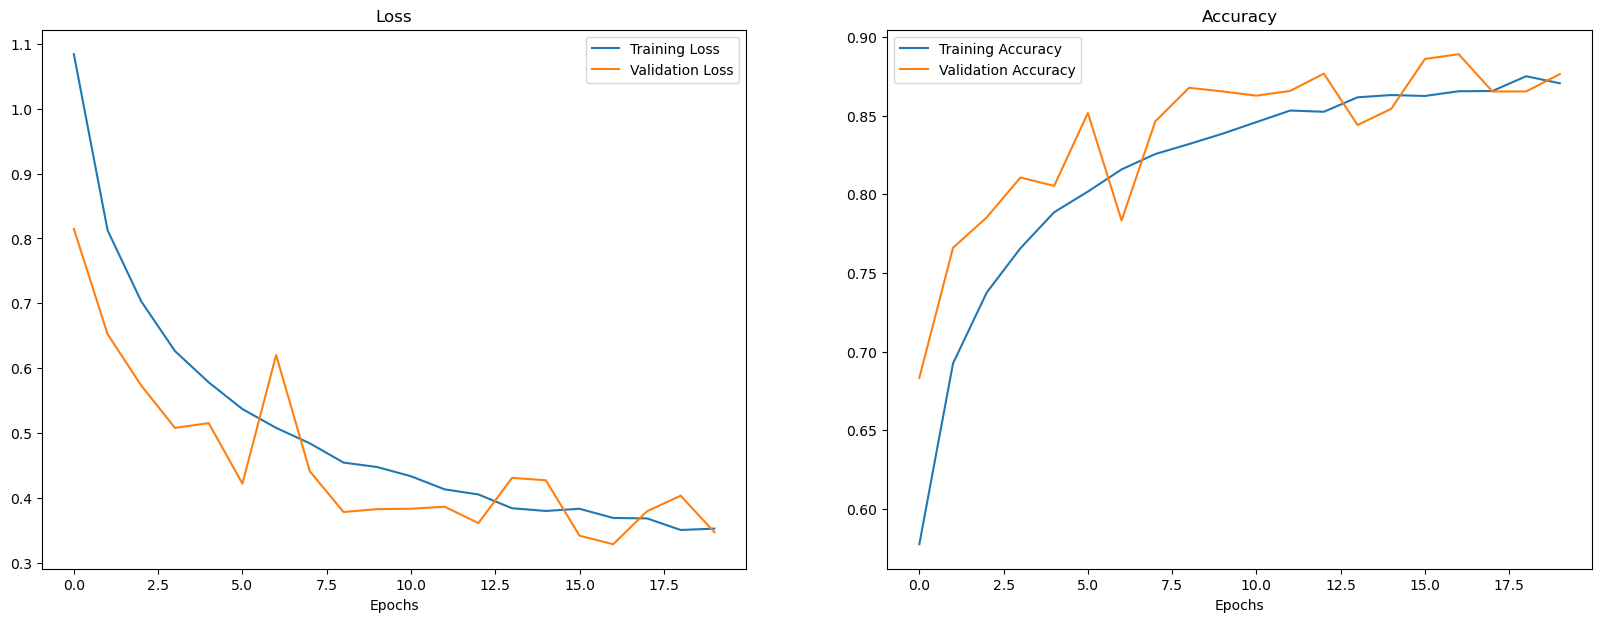

In [12]:
plot_loss_curves(history)

In [13]:
model.save('best_fit.h5')

/home/mllabs/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
